In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') 
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [5]:
nRowsRead = 1000 
df1 = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Europe%20Hotel%20Satisfaction%20Score/Europe%20Hotel%20Satisfaction%20Score/Europe%20Hotel%20Booking%20Satisfaction%20Score.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Europe Hotel Booking Satisfaction Score.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 17 columns


In [6]:
df1.head(5)

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [7]:
df1.count

<bound method DataFrame.count of          id  Gender  Age purpose_of_travel   Type of Travel  \
0     70172    Male   13          aviation  Personal Travel   
1      5047    Male   25           tourism     Group Travel   
2    110028  Female   26           tourism     Group Travel   
3     24026  Female   25           tourism     Group Travel   
4    119299    Male   61          aviation     Group Travel   
..      ...     ...  ...               ...              ...   
995   36608    Male   28          business     Group Travel   
996  121263    Male   53           tourism  Personal Travel   
997   16712    Male   48          academic  Personal Travel   
998   22022  Female   46          academic     Group Travel   
999   59019  Female   50          aviation     Group Travel   

       Type Of Booking  Hotel wifi service  Departure/Arrival  convenience  \
0          Not defined                   3                               4   
1       Group bookings                   3            

In [8]:
df1 = df1.rename(columns={'Departure/Arrival  convenience': 'DepartureArrival_convenience', 'Checkin/Checkout service': 'CheckinCheckout_service', 'Type of Travel': 'Type_of_Travel' })
df2 = df1.drop(['id','Type Of Booking','Hotel wifi service', 'DepartureArrival_convenience', 'Ease of Online booking', 'Hotel location', 'Food and drink', 'Stay comfort', 'Common Room entertainment', 'CheckinCheckout_service', 'Other service', 'Cleanliness'], axis=1)
df2.head(5) 

,Gender,Age,purpose_of_travel,Type_of_Travel,satisfaction
0,Male,13,aviation,Personal Travel,neutral or dissatisfied
1,Male,25,tourism,Group Travel,neutral or dissatisfied
2,Female,26,tourism,Group Travel,satisfied
3,Female,25,tourism,Group Travel,neutral or dissatisfied
4,Male,61,aviation,Group Travel,satisfied


In [9]:
df2['Gender'] = df2['Gender'].replace(['Male'],'1')
df2['Gender'] = df2['Gender'].replace(['Female'],'2')

df2['Type_of_Travel'] = df2['Type_of_Travel'].replace(['Personal Travel'],'1')
df2['Type_of_Travel'] = df2['Type_of_Travel'].replace(['Group Travel'],'2')

df2['satisfaction'] = df2['satisfaction'].replace(['neutral or dissatisfied'],'2')
df2['satisfaction'] = df2['satisfaction'].replace(['satisfied'],'1')

df2['purpose_of_travel'] = df2['purpose_of_travel'].replace(['tourism'],'5')
df2['purpose_of_travel'] = df2['purpose_of_travel'].replace(['academic'],'4')
df2['purpose_of_travel'] = df2['purpose_of_travel'].replace(['buisness'],'3')
df2['purpose_of_travel'] = df2['purpose_of_travel'].replace(['aviation'],'2')
df2['purpose_of_travel'] = df2['purpose_of_travel'].replace(['personal'],'1')

df2.head(5)

,Gender,Age,purpose_of_travel,Type_of_Travel,satisfaction
0,1,13,2,1,2
1,1,25,5,2,2
2,2,26,5,2,1
3,2,25,5,2,2
4,1,61,2,2,1


In [10]:
df2.dtypes

Gender               object
Age                   int64
purpose_of_travel    object
Type_of_Travel       object
satisfaction         object
dtype: object

In [11]:
df2['Gender']=df2.Gender.astype(int)
df2['Type_of_Travel']=df2.Type_of_Travel.astype(int)
df2['satisfaction']=df2.satisfaction.astype(int) 
df3 = df2.drop(['purpose_of_travel'], axis=1)
df3.dtypes
df3.head(5)

,Gender,Age,Type_of_Travel,satisfaction
0,1,13,1,2
1,1,25,2,2
2,2,26,2,1
3,2,25,2,2
4,1,61,2,1


In [12]:
df3.corr()

,Gender,Age,Type_of_Travel,satisfaction
Gender,1.000000,0.004695,-0.020543,0.036107
Age,0.004695,1.000000,0.046074,-0.160106
Type_of_Travel,-0.020543,0.046074,1.000000,-0.489522
satisfaction,0.036107,-0.160106,-0.489522,1.000000


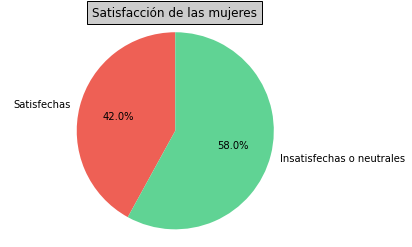

              Gender  Age  Type_of_Travel
satisfaction                             
1                225  225             225
2                266  266             266


In [13]:
import matplotlib.pyplot as plt
labels = 'Satisfechas', 'Insatisfechas o neutrales'
sizes = [42, 58]
fig1, ax1 = plt.subplots()
colors= ["#EE6055", "#60D394"]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors= colors)
ax1.axis('equal')
plt.title("Satisfacción de las mujeres", bbox={'facecolor':'0.8', 'pad':5})
plt.show()


filtro= df3['Gender']< 2
df5=df3[filtro]

freq= df5.groupby(['satisfaction']).count() 
print(freq)

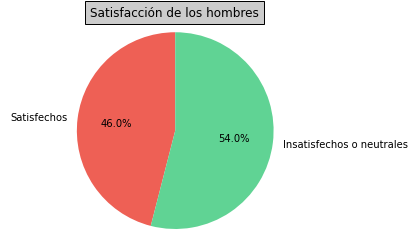

In [14]:
import matplotlib.pyplot as plt
labels = 'Satisfechos', 'Insatisfechos o neutrales'
sizes = [46, 54]
fig1, ax1 = plt.subplots()
colors= ["#EE6055", "#60D394"]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors= colors)
ax1.axis('equal')
plt.title("Satisfacción de los hombres", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [15]:
filtro= df3['Age']< 18 
df6=df3[filtro]

freq= df6.groupby(['satisfaction']).count()
print(freq)

              Gender  Age  Type_of_Travel
satisfaction                             
1                  8    8               8
2                 75   75              75


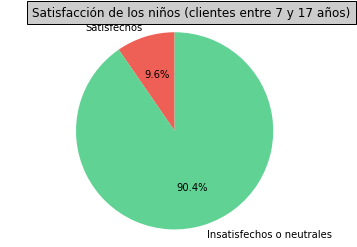

              Gender  Age  Type_of_Travel
satisfaction                             
1                 90   90              90
2                228  228             228


In [16]:
import matplotlib.pyplot as plt
labels = 'Satisfechos', 'Insatisfechos o neutrales'
sizes = [9.6, 90.4]
fig1, ax1 = plt.subplots()
colors= ["#EE6055", "#60D394"]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors= colors)
ax1.axis('equal')
plt.title('Satisfacción de los niños (clientes entre 7 y 17 años)',position=(0.55, 1.1), bbox={'facecolor':'0.8', 'pad':5})
plt.show()

filtro= df3['Age']< 30 
df6=df3[filtro]

freq= df6.groupby(['satisfaction']).count()
print(freq)

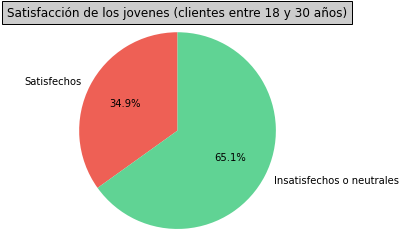

              Gender  Age  Type_of_Travel
satisfaction                             
1                426  426             426
2                503  503             503


In [17]:
import matplotlib.pyplot as plt
labels = 'Satisfechos', 'Insatisfechos o neutrales'
sizes = [34.9, 65.1]
fig1, ax1 = plt.subplots()
colors= ["#EE6055", "#60D394"]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors= colors)
ax1.axis('equal')
plt.title('Satisfacción de los jovenes (clientes entre 18 y 30 años)', bbox={'facecolor':'0.8', 'pad':5})
plt.show()

filtro= df3['Age']< 61 
df7=df3[filtro]

freq= df7.groupby(['satisfaction']).count()
print(freq)

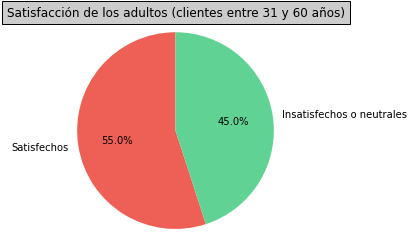

              Gender  Age  Type_of_Travel
satisfaction                             
1                440  440             440
2                560  560             560


In [18]:
import matplotlib.pyplot as plt
labels = 'Satisfechos', 'Insatisfechos o neutrales'
sizes = [55, 45]
fig1, ax1 = plt.subplots()
colors= ["#EE6055", "#60D394"]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors= colors)
ax1.axis('equal')
plt.title('Satisfacción de los adultos (clientes entre 31 y 60 años)', bbox={'facecolor':'0.8', 'pad':5})
plt.show()

filtro= df3['Age']< 86 
df8=df3[filtro]

freq= df8.groupby(['satisfaction']).count()
print(freq)

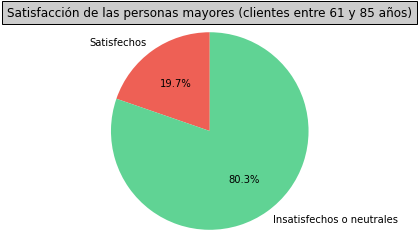

In [19]:
import matplotlib.pyplot as plt
labels = 'Satisfechos', 'Insatisfechos o neutrales'
sizes = [19.7, 80.3]
fig1, ax1 = plt.subplots()
colors= ["#EE6055", "#60D394"]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors= colors)
ax1.axis('equal')
plt.title('Satisfacción de las personas mayores (clientes entre 61 y 85 años)', bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [20]:
filtro= df3['Type_of_Travel']>1 # Dejo solo los clientes que viajan en grupo, ya que les he atribuido el número 2.
df9=df3[filtro]

freq= df9.groupby(['satisfaction']).count() # Quiero saber cuantos de los clientes que viajan en grupo estÁn satisfechos 1 o instatisfechos 2. 
print(freq)

              Gender  Age  Type_of_Travel
satisfaction                             
1                417  417             417
2                276  276             276


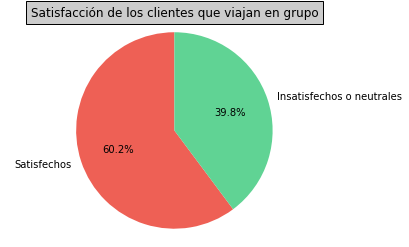

In [21]:
import matplotlib.pyplot as plt
labels = 'Satisfechos', 'Insatisfechos o neutrales'
sizes = [60.2, 39.8]
fig1, ax1 = plt.subplots()
colors= ["#EE6055", "#60D394"]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors= colors)
ax1.axis('equal')
plt.title('Satisfacción de los clientes que viajan en grupo', bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [22]:
filtro= df3['Type_of_Travel']<2 #Dejo solo los que viajan solos, ya que les he atribuido el número 1.
dft=df3[filtro]

freq= dft.groupby(['satisfaction']).count() # Quiero saber cuantos de los clientes que viajan solos están satisfechas 1 o instatisfechas 2. 
print(freq)

              Gender  Age  Type_of_Travel
satisfaction                             
1                 23   23              23
2                284  284             284


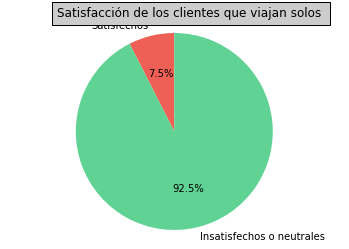

In [23]:
import matplotlib.pyplot as plt
labels = 'Satisfechos', 'Insatisfechos o neutrales'
sizes = [7.5, 92.5]
fig1, ax1 = plt.subplots()
colors= ["#EE6055", "#60D394"]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors= colors)
ax1.axis('equal')
plt.title('Satisfacción de los clientes que viajan solos ', position=(0.55, 1.1), bbox={'facecolor':'0.8', 'pad':5}, )
plt.show()

In [24]:
df1 = df1.rename(columns={'Departure/Arrival convenience': 'DepartureArrival_convenience', 'Checkin/Checkout service': 'CheckinCheckout_service', 'Type of Travel': 'Type_of_Travel', 'Type Of Booking': 'Type_Of_Booking', 'Hotel wifi service': 'Hotel_wifi_service', 'Ease of Online booking': 'Ease_of_Online_booking', 'Hotel location': 'Hotel_location', 'Food and drink': 'Food_and_drink', 'Stay comfort': 'Stay_comfort', 'Common Room entertainment': 'Common_Room_entertainment', 'Other service': 'Other_service' })
df10 = df1.drop(['id','Type_Of_Booking', 'purpose_of_travel'], axis=1) 


df10['Gender'] = df10['Gender'].replace(['Male'],'1')
df10['Gender'] = df10['Gender'].replace(['Female'],'2')

df10['Type_of_Travel'] = df10['Type_of_Travel'].replace(['Personal Travel'],'1')
df10['Type_of_Travel'] = df10['Type_of_Travel'].replace(['Group Travel'],'2')

df10['satisfaction'] = df10['satisfaction'].replace(['neutral or dissatisfied'],'2')
df10['satisfaction'] = df10['satisfaction'].replace(['satisfied'],'1')


df10['Gender']=df10.Gender.astype(int)
df10['Type_of_Travel']=df10.Type_of_Travel.astype(int)
df10['satisfaction']=df10.satisfaction.astype(int)

df10.dtypes

Gender                          int64
Age                             int64
Type_of_Travel                  int64
Hotel_wifi_service              int64
DepartureArrival_convenience    int64
Ease_of_Online_booking          int64
Hotel_location                  int64
Food_and_drink                  int64
Stay_comfort                    int64
Common_Room_entertainment       int64
CheckinCheckout_service         int64
Other_service                   int64
Cleanliness                     int64
satisfaction                    int64
dtype: object

In [25]:
filtro= df10['Type_of_Travel']< 2 # Dejo solo los que viajan solos, ya que son los más insatisfechos.
dft=df10[filtro]

filtro= dft['Age'] > 60
dfg= dft[filtro]

freq= dft.groupby(['Hotel_wifi_service']).count()  
print(freq)

                    Gender  Age  Type_of_Travel  DepartureArrival_convenience  \
Hotel_wifi_service                                                              
0                        6    6               6                             6   
1                       49   49              49                            49   
2                      106  106             106                           106   
3                       91   91              91                            91   
4                       48   48              48                            48   
5                        7    7               7                             7   

                    Ease_of_Online_booking  Hotel_location  Food_and_drink  \
Hotel_wifi_service                                                           
0                                        6               6               6   
1                                       49              49              49   
2                                      

In [26]:
filtro= df10['Type_of_Travel']< 2 
dft=df10[filtro]

filtro= dft['Age'] > 60 
dfg= dft[filtro]

freq= dft.groupby(['Hotel_wifi_service']).count()  
print(freq)

                    Gender  Age  Type_of_Travel  DepartureArrival_convenience  \
Hotel_wifi_service                                                              
0                        6    6               6                             6   
1                       49   49              49                            49   
2                      106  106             106                           106   
3                       91   91              91                            91   
4                       48   48              48                            48   
5                        7    7               7                             7   

                    Ease_of_Online_booking  Hotel_location  Food_and_drink  \
Hotel_wifi_service                                                           
0                                        6               6               6   
1                                       49              49              49   
2                                      

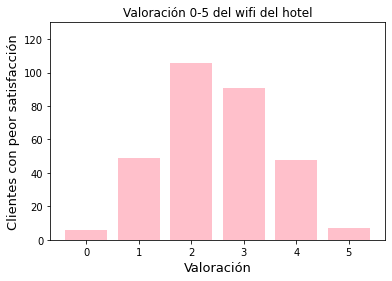

In [27]:
x=[0,1,2,3,4,5]
y=[6,49,106,91,48, 7]
plt.title('Valoración 0-5 del wifi del hotel')
plt.ylim(0, 130)
plt.bar(x,y, color='pink')
plt.ylabel("Clientes con peor satisfacción",fontsize=13)
plt.xlabel("Valoración",fontsize=13)
plt.show()

In [28]:
filtro= df10['Type_of_Travel']< 2 
dft=df10[filtro]

filtro= dft['Age'] > 60 
dfg= dft[filtro]

freq= dft.groupby(['DepartureArrival_convenience']).count()  
print(freq)

                              Gender  Age  Type_of_Travel  Hotel_wifi_service  \
DepartureArrival_convenience                                                    
0                                  9    9               9                   9   
1                                 22   22              22                  22   
2                                 34   34              34                  34   
3                                 38   38              38                  38   
4                                 93   93              93                  93   
5                                111  111             111                 111   

                              Ease_of_Online_booking  Hotel_location  \
DepartureArrival_convenience                                           
0                                                  9               9   
1                                                 22              22   
2                                                 34           

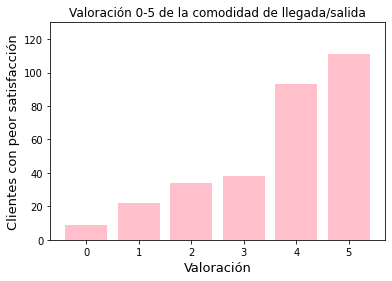

In [29]:
x=[0,1,2,3,4,5]
y=[9,22,34,38,93,111]
plt.title('Valoración 0-5 de la comodidad de llegada/salida')
plt.ylim(0, 130)
plt.bar(x,y, color='pink')
plt.ylabel("Clientes con peor satisfacción",fontsize=13)
plt.xlabel("Valoración",fontsize=13)
plt.show()

In [30]:
filtro= df10['Type_of_Travel']< 2
dft=df10[filtro]

filtro= dft['Age'] > 60 
dfg= dft[filtro]

freq= dft.groupby(['Ease_of_Online_booking']).count()  
print(freq)

                        Gender  Age  Type_of_Travel  Hotel_wifi_service  \
Ease_of_Online_booking                                                    
0                           15   15              15                  15   
1                           44   44              44                  44   
2                          103  103             103                 103   
3                           83   83              83                  83   
4                           50   50              50                  50   
5                           12   12              12                  12   

                        DepartureArrival_convenience  Hotel_location  \
Ease_of_Online_booking                                                 
0                                                 15              15   
1                                                 44              44   
2                                                103             103   
3                                      

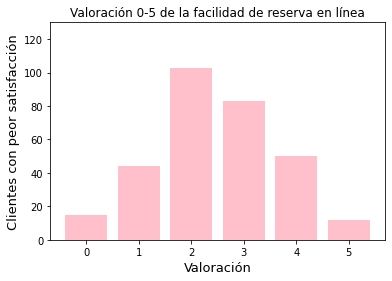

In [31]:
x=[0,1,2,3,4,5]
y=[15,44,103,83,50,12]
plt.title('Valoración 0-5 de la facilidad de reserva en línea')
plt.ylim(0, 130)
plt.bar(x,y, color='pink')
plt.ylabel("Clientes con peor satisfacción",fontsize=13)
plt.xlabel("Valoración",fontsize=13)
plt.show()

In [32]:
filtro= df10['Type_of_Travel']< 2
dft=df10[filtro]

filtro= dft['Age'] > 60 
dfg= dft[filtro]

freq= dft.groupby(['Hotel_location']).count()  
print(freq)

                Gender  Age  Type_of_Travel  Hotel_wifi_service  \
Hotel_location                                                    
1                   44   44              44                  44   
2                   58   58              58                  58   
3                  119  119             119                 119   
4                   68   68              68                  68   
5                   18   18              18                  18   

                DepartureArrival_convenience  Ease_of_Online_booking  \
Hotel_location                                                         
1                                         44                      44   
2                                         58                      58   
3                                        119                     119   
4                                         68                      68   
5                                         18                      18   

                Food_and_

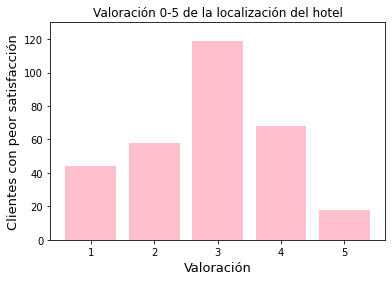

In [33]:
x=[1,2,3,4,5]
y=[44,58,119,68,18]
plt.title('Valoración 0-5 de la localización del hotel')
plt.ylim(0, 130)
plt.bar(x,y, color='pink')
plt.ylabel("Clientes con peor satisfacción",fontsize=13)
plt.xlabel("Valoración",fontsize=13)
plt.show()

In [34]:
filtro= df10['Type_of_Travel']< 2 
dft=df10[filtro]

filtro= dft['Age'] > 60 
dfg= dft[filtro]

freq= dft.groupby(['Food_and_drink']).count()  
print(freq)

                Gender  Age  Type_of_Travel  Hotel_wifi_service  \
Food_and_drink                                                    
0                    1    1               1                   1   
1                   64   64              64                  64   
2                   62   62              62                  62   
3                   58   58              58                  58   
4                   62   62              62                  62   
5                   60   60              60                  60   

                DepartureArrival_convenience  Ease_of_Online_booking  \
Food_and_drink                                                         
0                                          1                       1   
1                                         64                      64   
2                                         62                      62   
3                                         58                      58   
4                              

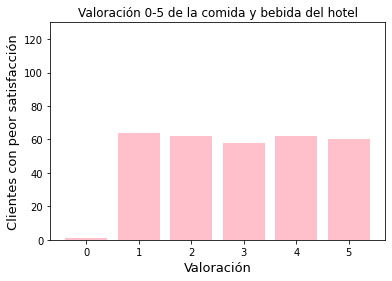

In [35]:
x=[0,1,2,3,4,5]
y=[1,64,62,58,62, 60]
plt.title('Valoración 0-5 de la comida y bebida del hotel')
plt.ylim(0, 130)
plt.bar(x,y, color='pink')
plt.ylabel("Clientes con peor satisfacción",fontsize=13)
plt.xlabel("Valoración",fontsize=13)
plt.show()

In [36]:
filtro= df10['Type_of_Travel']< 2
dft=df10[filtro]

filtro= dft['Age'] > 60 
dfg= dft[filtro]

freq= dft.groupby(['Stay_comfort']).count()  
print(freq)

              Gender  Age  Type_of_Travel  Hotel_wifi_service  \
Stay_comfort                                                    
1                 70   70              70                  70   
2                 46   46              46                  46   
3                 49   49              49                  49   
4                 74   74              74                  74   
5                 68   68              68                  68   

              DepartureArrival_convenience  Ease_of_Online_booking  \
Stay_comfort                                                         
1                                       70                      70   
2                                       46                      46   
3                                       49                      49   
4                                       74                      74   
5                                       68                      68   

              Hotel_location  Food_and_drink  Common_

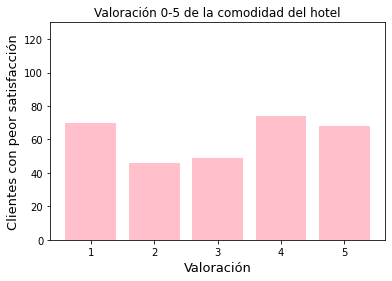

In [37]:
x=[1,2,3,4,5]
y=[70,46,49,74,68]
plt.title('Valoración 0-5 de la comodidad del hotel')
plt.ylim(0, 130)
plt.bar(x,y, color='pink')
plt.ylabel("Clientes con peor satisfacción",fontsize=13)
plt.xlabel("Valoración",fontsize=13)
plt.show()

In [39]:
filtro= df10['Type_of_Travel']< 2 
dft=df10[filtro]

filtro= dft['Age'] > 60 
dfg= dft[filtro]

freq= dft.groupby(['Common_Room_entertainment']).count()  
print(freq)

                           Gender  Age  Type_of_Travel  Hotel_wifi_service  \
Common_Room_entertainment                                                    
1                              70   70              70                  70   
2                              52   52              52                  52   
3                              61   61              61                  61   
4                              68   68              68                  68   
5                              56   56              56                  56   

                           DepartureArrival_convenience  \
Common_Room_entertainment                                 
1                                                    70   
2                                                    52   
3                                                    61   
4                                                    68   
5                                                    56   

                           Ease_of_Onli

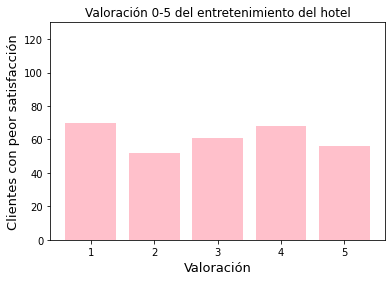

In [40]:
x=[1,2,3,4,5]
y=[70,52,61,68,56]
plt.title('Valoración 0-5 del entretenimiento del hotel')
plt.ylim(0, 130)
plt.bar(x,y, color='pink')
plt.ylabel("Clientes con peor satisfacción",fontsize=13)
plt.xlabel("Valoración",fontsize=13)
plt.show()

In [41]:
filtro= df10['Type_of_Travel']< 2 
dft=df10[filtro]

filtro= dft['Age'] > 60 
dfg= dft[filtro]

freq= dft.groupby(['CheckinCheckout_service']).count()  
print(freq)

                         Gender  Age  Type_of_Travel  Hotel_wifi_service  \
CheckinCheckout_service                                                    
1                            34   34              34                  34   
2                            30   30              30                  30   
3                            93   93              93                  93   
4                            93   93              93                  93   
5                            57   57              57                  57   

                         DepartureArrival_convenience  Ease_of_Online_booking  \
CheckinCheckout_service                                                         
1                                                  34                      34   
2                                                  30                      30   
3                                                  93                      93   
4                                                  93         

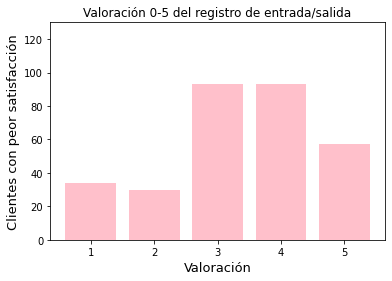

In [42]:
x=[1,2,3,4,5]
y=[34,30,93,93,57]
plt.title('Valoración 0-5 del registro de entrada/salida')
plt.ylim(0, 130)
plt.bar(x,y, color='pink')
plt.ylabel("Clientes con peor satisfacción",fontsize=13)
plt.xlabel("Valoración",fontsize=13)
plt.show()

In [43]:
filtro= df10['Type_of_Travel']< 2 
dft=df10[filtro]

filtro= dft['Age'] > 60 
dfg= dft[filtro]

freq= dft.groupby(['Other_service']).count()  
print(freq)

               Gender  Age  Type_of_Travel  Hotel_wifi_service  \
Other_service                                                    
1                  29   29              29                  29   
2                  32   32              32                  32   
3                  51   51              51                  51   
4                 103  103             103                 103   
5                  92   92              92                  92   

               DepartureArrival_convenience  Ease_of_Online_booking  \
Other_service                                                         
1                                        29                      29   
2                                        32                      32   
3                                        51                      51   
4                                       103                     103   
5                                        92                      92   

               Hotel_location  Food_and

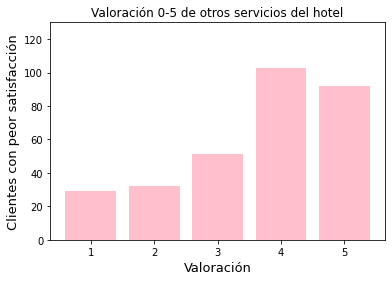

In [44]:
x=[1,2,3,4,5]
y=[29,32,51,103,92]
plt.title('Valoración 0-5 de otros servicios del hotel')
plt.ylim(0, 130)
plt.bar(x,y, color='pink')
plt.ylabel("Clientes con peor satisfacción",fontsize=13)
plt.xlabel("Valoración",fontsize=13)
plt.show()

In [45]:
filtro= df10['Type_of_Travel']< 2 
dft=df10[filtro]

filtro= dft['Age'] > 60 
dfg= dft[filtro]

freq= dft.groupby(['Cleanliness']).count()  
print(freq)

             Gender  Age  Type_of_Travel  Hotel_wifi_service  \
Cleanliness                                                    
1                63   63              63                  63   
2                56   56              56                  56   
3                67   67              67                  67   
4                60   60              60                  60   
5                61   61              61                  61   

             DepartureArrival_convenience  Ease_of_Online_booking  \
Cleanliness                                                         
1                                      63                      63   
2                                      56                      56   
3                                      67                      67   
4                                      60                      60   
5                                      61                      61   

             Hotel_location  Food_and_drink  Stay_comfort  \
Cleanl